In [1]:
import os
from pathlib import Path

from dotenv import load_dotenv
from ultralytics import YOLO

from utils.data import DentexDataset


/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


# Data prepare

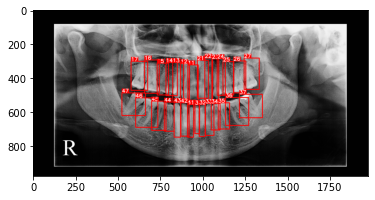

In [2]:
load_dotenv()
data_dir = Path(os.getenv('DATASET_DIR')) / 'DENTEX CHALLENGE 2023'

dataset = DentexDataset(root_dir=data_dir, sample=True)

image_name = dataset.annotations.index[0]
dataset.plot(image_name)


In [3]:
yaml_root = Path('../data/dentex-sample').absolute()
yaml_path = dataset.yolo_yaml_gen(path=yaml_root)


# Training

In [4]:
model = YOLO('yolov8n.pt')

results = model.train(data=yaml_path, epochs=100, imgsz=640, project='YOLOv8')


Ultralytics YOLOv8.0.182 🚀 Python-3.9.16 torch-1.10.0 CPU (Apple M1)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/lucyxu/PycharmProjects/dentist-CV/supervised/../data/dentex-sample/dentex.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLOv8, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False

KeyboardInterrupt: 